▶**TASK-1 : TITANIC SURVIVAL PREDICTION**

> Author: Sanskar Dewangan

> Batch: August 2023

> Domain: Data Science


> Aim: To build a model that predicts whether a
passenger on the Titanic survived or not.



*IMPORTING IMPORTANT LIBRARIES*



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [2]:
df = pd.read_csv("tested.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape


(1309, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


***From above cell it is clear there there are few missing values in age column***

In [5]:
df['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

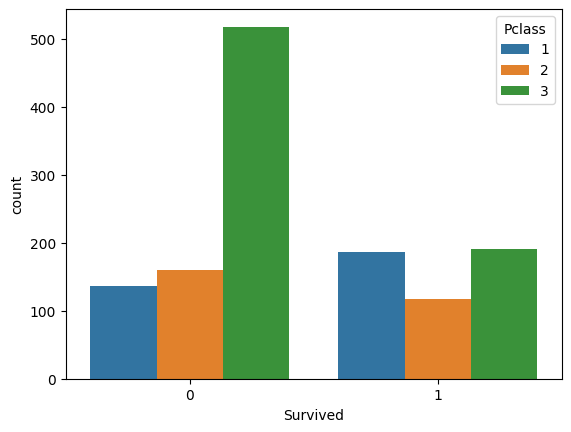

In [6]:
#let's visualize the count of survivals wrt pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [7]:
df["Sex"]

0         male
1       female
2       female
3       female
4         male
         ...  
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

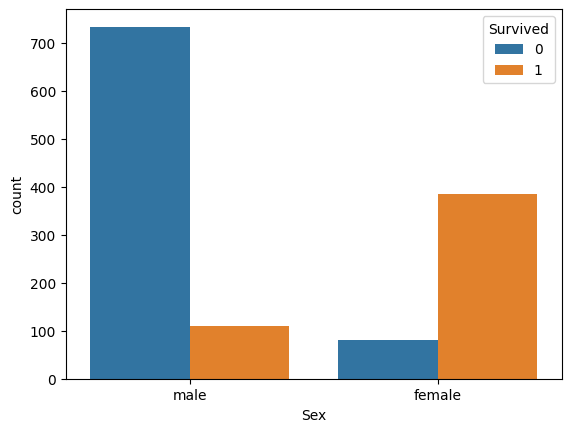

In [8]:
#let's visualize the count of survivals wrt Gender
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [9]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.82618
male,0.12930


In [10]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex']= labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Sex'], df['Survived']

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 1304    1
 1305    0
 1306    1
 1307    1
 1308    1
 Name: Sex, Length: 1309, dtype: int32,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 1304    0
 1305    1
 1306    0
 1307    0
 1308    0
 Name: Survived, Length: 1309, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

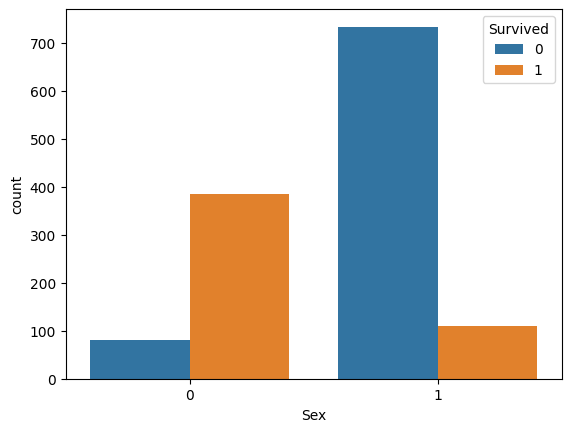

In [13]:
sns.countplot(x=df['Sex'], hue=df["Survived"])

In [14]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
# After dropping non required column
df=df.drop(['Age'], axis=1)

In [16]:
df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C


*MODEL TRAINING*

In [17]:
X= df[['Pclass', 'Sex']]
Y=df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

*MODEL PREDICTION*

In [20]:
pred = print(log.predict(X_test))


[1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 1 0]


In [21]:
print(Y_test)

1139    1
533     1
459     0
1150    0
393     1
       ..
753     0
1052    0
426     1
554     1
1213    0
Name: Survived, Length: 262, dtype: int64


In [23]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
